In [2]:
# Membuat pengecekan tensorflow
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

assert LooseVersion(tf.__version__) >= LooseVersion('1.0')
print("TensorFlow Version: {}".format(tf.__version__))

if not tf.test.gpu_device_name():
    warnings.warn("No GPU Found: Please ensure you have installed TensorFlow corrently")
else:
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))

TensorFlow Version: 2.7.0


C:\Users\prata\AppData\Local\Temp/ipykernel_23092/3749508200.py:10: UserWarning: No GPU Found: Please ensure you have installed TensorFlow corrently
  warnings.warn("No GPU Found: Please ensure you have installed TensorFlow corrently")


# Import Libraries

In [3]:
# Arsitektur CNN
from tensorflow.keras import layers, models, callbacks

# Generator dan Praproses Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Fungsi Loss
from keras.metrics import sparse_categorical_crossentropy

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan Direktori
import os

# Log
import pandas as pd

# Pra-pelatihan

In [4]:
# Membuat nama kelas berdasarkan urutan folder
class_names = [ 'ain', 'alif', 'ba', 'dal', 'dhod', 'dzal',
                'dzho', 'fa', 'ghoin', 'ha', 'ha\'', 'hamzah', 'jim',
                'kaf', 'kho', 'lam', 'lamalif', 'mim', 'nun', 'qof',
                'ro', 'shod', 'sin', 'syin', 'ta', 'tho', 'tsa', 
                'wawu', 'ya', 'zain']

In [5]:
import sys
from PIL import Image
sys.modules['Image'] = Image

## Arsitektur CNN

![arsitektur](arsitektur_baru2.png)


In [7]:
# Membuat arsitektur CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))

# Melihat detail arsitektur
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

## Dataset | Praproses dan Augmentasi

In [9]:
# Pengaturan direktori
PATH = 'dataset'
VAL_DATA = 'test_mixed'
TOTAL_TRAIN_DATA=1680
TRAIN_DIR = os.path.join(PATH, 'train')
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)

# Membuat generator pelatihan
train_datagen = ImageDataGenerator( 
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      shear_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb')


    


validation_datagen = ImageDataGenerator( rescale = 1./255 )

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

# i=0
# for batch in train_datagen.flow_from_directory(TRAIN_DIR,
#                                                     batch_size=BATCH_SIZE,
#                                                     class_mode='sparse',
#                                                     target_size=IMG_SIZE,
#                                                     color_mode='rgb',
#                                                     save_to_dir='augmented',
#                                                     save_prefix='aug',
#                                                     save_format='jpg'):
#     i += 1
#     if i > 0:
#         break

# print(train_generator.n // train_generator.batch_size)
# print(validation_generator.n // validation_generator.batch_size)

Found 1680 images belonging to 30 classes.
Found 420 images belonging to 30 classes.


![Augmentasi Data](augmentasi.png)

## Pelatihan

In [10]:
# Callback untuk menyimpan model setiap epoch
model_save_callback = callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}_{accuracy:.3f}.h5', save_best_only=False, save_weights_only=False, monitor='val_accuracy')

# Inisialisasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan!
history = model.fit( train_generator,
                     steps_per_epoch=train_generator.n // train_generator.batch_size,
                     epochs=105, 
                     validation_data=validation_generator,
                     validation_steps= validation_generator.n // validation_generator.batch_size,
                     callbacks=[
                         model_save_callback
                     ]
                   ) 

Epoch 1/105
 6/30 [=====>........................] - ETA: 44s - loss: 3.4436 - accuracy: 0.0357

KeyboardInterrupt: 

## Visualisasi metrik

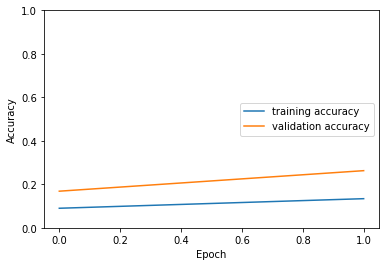

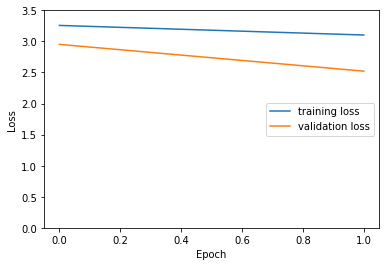

In [ ]:
# Menyimpan history pelatihan
pd.DataFrame(history.history).to_csv('history.csv')

# Visualisasi metrik akurasi selama pelatihan 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1]) 
plt.legend(loc='right')
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Visualisasi metrik loss selama pelatihan
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 3.5])
plt.legend(loc='right')
plt.savefig('train_val_loss_augmentation.png')
plt.show()

# Evaluasi Model 

In [11]:
# load model terbaik
loaded_model = models.load_model('models/bestModel.h5')

In [12]:
# Membuat fungsi load image untuk pengujian
def load_image(img_path):
  # Praproses data uji
  img = load_img(img_path, target_size=(150,150,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.0

  return img_tensor

In [13]:
# Membuat generator seperti sebelum pelatihan untuk data uji
PATH = 'dataset'
VAL_DATA = 'test_mixed'
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)


validation_datagen = ImageDataGenerator( rescale = 1./255 )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 420 images belonging to 30 classes.


## Pengujian manual

28


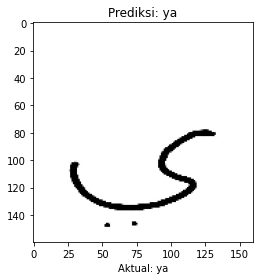

In [14]:
# load data uji
huruf = input("Nama huruf: ")
img_path = 'dataset/' + VAL_DATA + '/' + huruf + '/'+ huruf + '_5.jpg'
new_image = load_image(img_path)

# # prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()

In [15]:
# Pengujian GUI

from ipywidgets import *
from IPython.display import clear_output, display
from tkinter import Tk, filedialog

def select_files(file):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    file.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(file.files) # Print the list of files selected.

In [16]:
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

Button(description='File select', style=ButtonStyle())

15


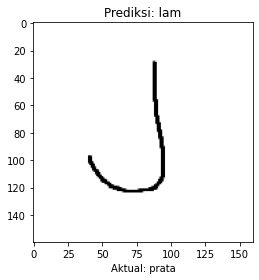

In [17]:
# Don't run this cell if the cell above hadn't run yet

files = fileselect.files
img_path = files[0]
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()